## tensorflow installation

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/lib/python3.12/dist-packages/tensorflow-2.19.0.dist-info/*
    /usr/local/lib/python3.12/dist-packages/tensorflow/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
                        ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.re

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


## **fruits classification model**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fruits-dataset.zip to fruits-dataset.zip


In [ ]:
!unzip -q /content/fruits-dataset.zip -d /content/

In [ ]:
data_train_path ='/content/Fruits Classification/train'
data_test_path = '/content/Fruits Classification/test'
data_val_path = '/content/Fruits Classification/valid'

In [ ]:
img_width= 180
img_height =180

In [ ]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False #so it doesnt automatically split dataset
)

Found 9700 files belonging to 5 classes.


In [ ]:
category =data_train.class_names
print(category)

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']


In [ ]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False #so it doesnt automatically split dataset
)

Found 200 files belonging to 5 classes.


In [ ]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False #so it doesnt automatically split dataset
)

Found 100 files belonging to 5 classes.


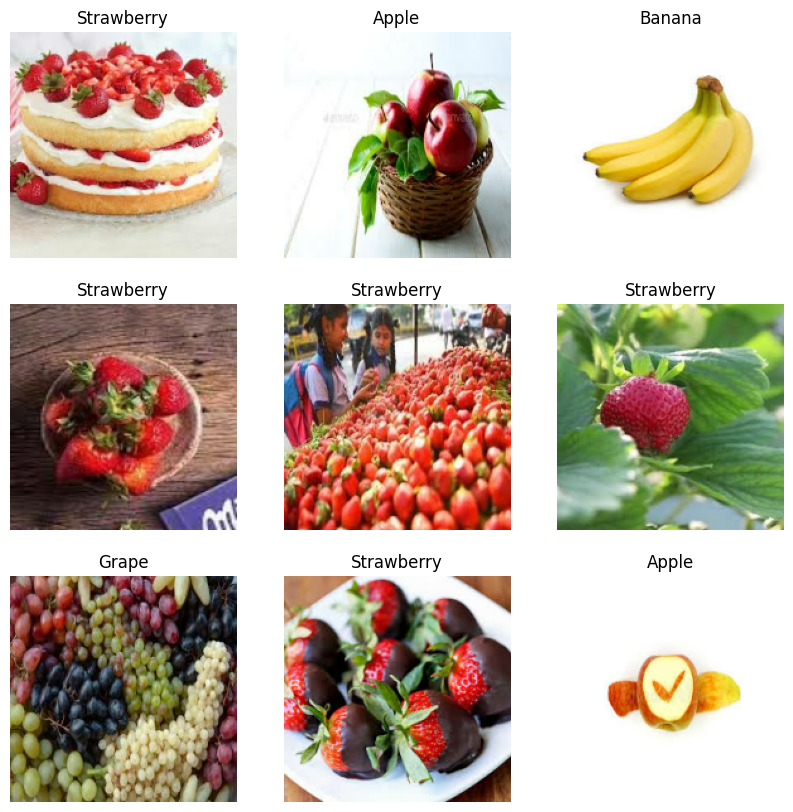

In [ ]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(category[labels[i]])
    plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#need to review the terminologies
model = Sequential([
    layers.Rescaling(1./255,input_shape=(img_width,img_height,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128,activation='relu'),
    layers.Dense(len(category))
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#uhh
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
epochs =25
history= model.fit(data_train, validation_data=data_val, epochs=epochs, batch_size=32, verbose=1)


Epoch 1/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 285s 930ms/step - accuracy: 0.4341 - loss: 1.3115 - val_accuracy: 0.5250 - val_loss: 1.0429
Epoch 2/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 316s 912ms/step - accuracy: 0.5992 - loss: 0.9903 - val_accuracy: 0.6350 - val_loss: 0.9276
Epoch 3/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 318s 896ms/step - accuracy: 0.6571 - loss: 0.8666 - val_accuracy: 0.6150 - val_loss: 0.9152
Epoch 4/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 325s 907ms/step - accuracy: 0.7156 - loss: 0.7420 - val_accuracy: 0.6000 - val_loss: 1.0184
Epoch 5/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 319s 896ms/step - accuracy: 0.7765 - loss: 0.6061 - val_accuracy: 0.5800 - val_loss: 1.1073
Epoch 6/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 320s 889ms/step - accuracy: 0.8384 - loss: 0.4466 - val_accuracy: 0.6050 - val_loss: 1.2373
Epoch 7/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 273s 897ms/step - accuracy: 0.8731 - loss: 0.3625 - val_accuracy: 0.6100 - val_loss: 1.4501
Epoch 8/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 274s 902ms/step - accuracy: 0.9228 -

**checkpoint**

### continue

Text(0.5, 1.0, 'loss for training and validation')

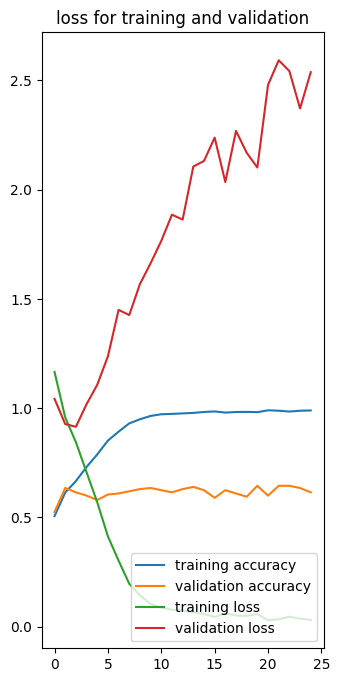

In [20]:
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='training accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='lower right')
plt.title('accuracy for training and validation')

plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['loss'], label='training loss')
plt.plot(epochs_range, history.history['val_loss'], label='validation loss')
plt.legend(loc='lower right')
plt.title('loss for training and validation')

## **testing**

In [41]:
image='/content/Fruits Classification/test/Banana/Banana (2120).jpeg' #banana
image= tf.keras.utils.load_img(image, target_size=(img_width,img_height))
img_arr= tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)

In [34]:
image2='/content/Fruits Classification/test/Strawberry/Strawberry (2000).jpeg' #strawberry
image2= tf.keras.utils.load_img(image2, target_size=(img_width,img_height))
img2_arr= tf.keras.utils.img_to_array(image2)
img2_bat=tf.expand_dims(img2_arr,0)

In [59]:
image3='/content/Fruits Classification/test/Apple/Apple (1526).jpeg' #apple
image3= tf.keras.utils.load_img(image3, target_size=(img_width,img_height))
img3_arr= tf.keras.utils.img_to_array(image3)
img3_bat=tf.expand_dims(img3_arr,0)

In [60]:
predict3=model.predict(img3_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [61]:
score3=tf.nn.softmax(predict3)

In [62]:
print('your fruit is probably {}, predicted with an accuracy of {:0.2f} !!'.format(category[np.argmax(score3)],np.max(score3)*100))

your fruit is probably Apple, predicted with an accuracy of 98.69 !!


In [53]:
predict=model.predict(img_bat)
predict2=model.predict(img2_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [55]:
score=tf.nn.softmax(predict)
score2=tf.nn.softmax(predict2)

In [44]:
print('your fruit is probably {}, predicted with an accuracy of {:0.2f} !!'.format(category[np.argmax(score)],np.max(score)*100))

your fruit is probably Banana, predicted with an accuracy of 99.90 !!


In [37]:
print('your fruit is probably {}, predicted with an accuracy of {:0.2f} !!'.format(category[np.argmax(score2)],np.max(score2)*100))

your fruit is probably Strawberry, predicted with an accuracy of 100.00 !!


In [63]:
# if we want to print other probabilites as well
#this is just for the first one so for banana
print("\nother probabilities: ")
for i, score in enumerate(predict[0]):
    print(f"{category[i]}: {score*100:.2f}%")


other probabilities: 
Apple: 306.33%
Banana: 1115.26%
Grape: -1188.28%
Mango: 382.46%
Strawberry: -4316.54%


**testing using image outside of test**

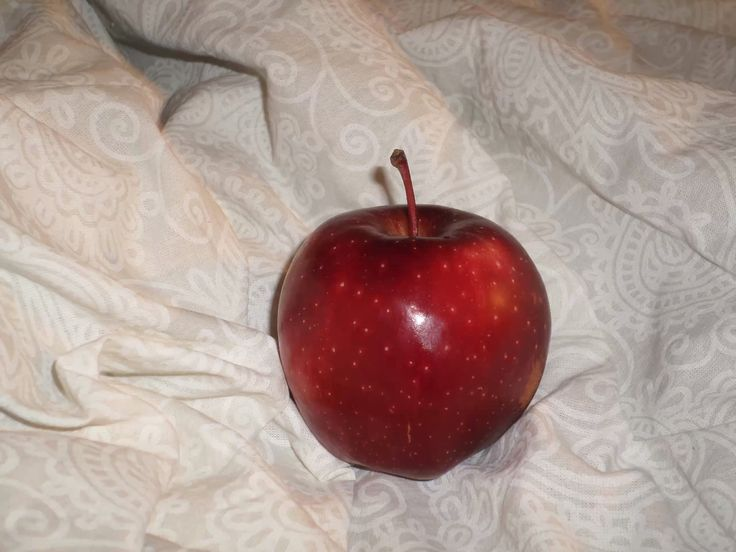

In [118]:
from IPython.display import Image, display
display(Image(filename="/content/random2.jpg", width=300, height=200))

In [119]:
image='/content/random2.jpg'
image= tf.keras.utils.load_img(image, target_size=(img_width,img_height))
img_arr= tf.keras.utils.img_to_array(image)
img_bat=tf.expand_dims(img_arr,0)

In [120]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [121]:
score=tf.nn.softmax(predict)

In [122]:
print('fruit predicted: {}, accuracy of {:0.2f}'.format(category[np.argmax(score)],np.max(score)*100))

fruit predicted: Apple, accuracy of 92.48


In [124]:
model.save('fruits-classify2.keras')